# **HW3**

## **Problem 1**

### **Part a**

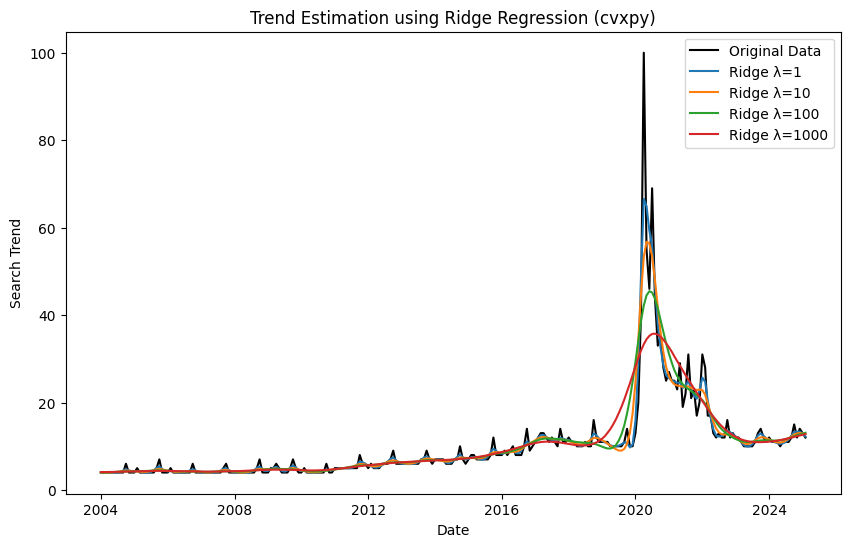

In [48]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt

file_path = "multiTimeline_mask.csv"
df = pd.read_csv(file_path, skiprows=1)

df.columns = ['Month', 'Trend']
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')

y = df['Trend'].values
n = len(y)

x = np.arange(1, n + 1)
X = np.column_stack([np.ones(n), x - 1])
for i in range(n - 2):
    c = i + 2
    xc = ((x > c).astype(float)) * (x - c)
    X = np.column_stack([X, xc])

def solve_ridge(X, y, lambda_val, penalty_start=1):
    """ Solves Ridge Regression using cvxpy """
    n, p = X.shape
    beta = cp.Variable(p)
    loss = cp.sum_squares(X @ beta - y)
    reg = lambda_val * cp.sum_squares(beta[penalty_start:]) 
    objective = cp.Minimize(loss + reg)
    prob = cp.Problem(objective)
    prob.solve()
    return beta.value

lambda_values = [1, 10, 100, 1000]
ridge_estimates = {lmb: solve_ridge(X, y, lmb) for lmb in lambda_values}

plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label='Original Data', color='black')

for lmb, beta in ridge_estimates.items():
    plt.plot(df.index, X @ beta, label=f'Ridge λ={lmb}')

plt.xlabel('Date')
plt.ylabel('Search Trend')
plt.title('Trend Estimation using Ridge Regression (cvxpy)')
plt.legend()
plt.show()


From the graph we can see $\lambda = 1000$ is the best interpret the trend.

### **Part b**

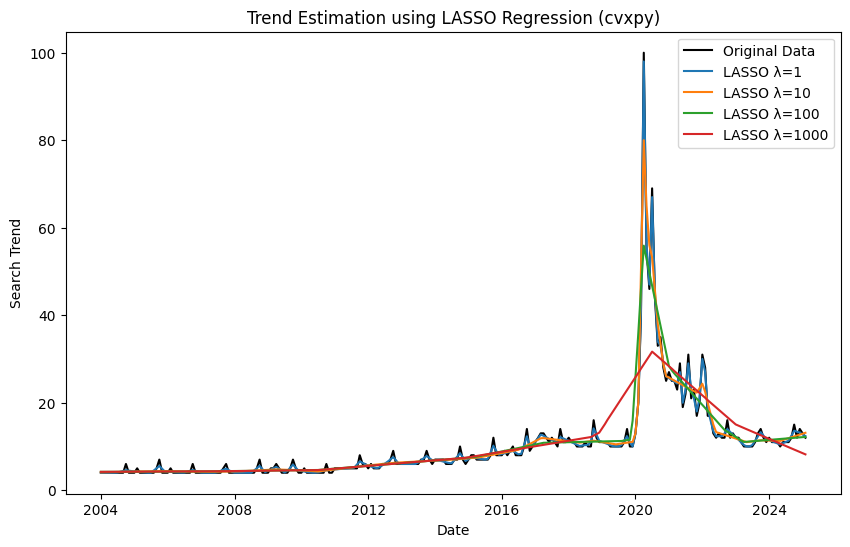

In [49]:
def solve_lasso(X, y, lambda_val, penalty_start=1):
    """ Solves LASSO Regression using cvxpy """
    n, p = X.shape
    beta = cp.Variable(p)
    loss = cp.sum_squares(X @ beta - y)
    reg = lambda_val * cp.norm1(beta[penalty_start:]) 
    objective = cp.Minimize(loss + reg)
    prob = cp.Problem(objective)
    prob.solve()
    return beta.value

lasso_estimates = {lmb: solve_lasso(X, y, lmb) for lmb in lambda_values}

plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label='Original Data', color='black')

for lmb, beta in lasso_estimates.items():
    plt.plot(df.index, X @ beta, label=f'LASSO λ={lmb}')

plt.xlabel('Date')
plt.ylabel('Search Trend')
plt.title('Trend Estimation using LASSO Regression (cvxpy)')
plt.legend()
plt.show()


From the graph we can see $\lambda = 1000$ provides the best fit

### **Part c**

I would say Ridge($\lambda = 1000$) best estimate the trend.

## **Problem 2**

### **Part a**

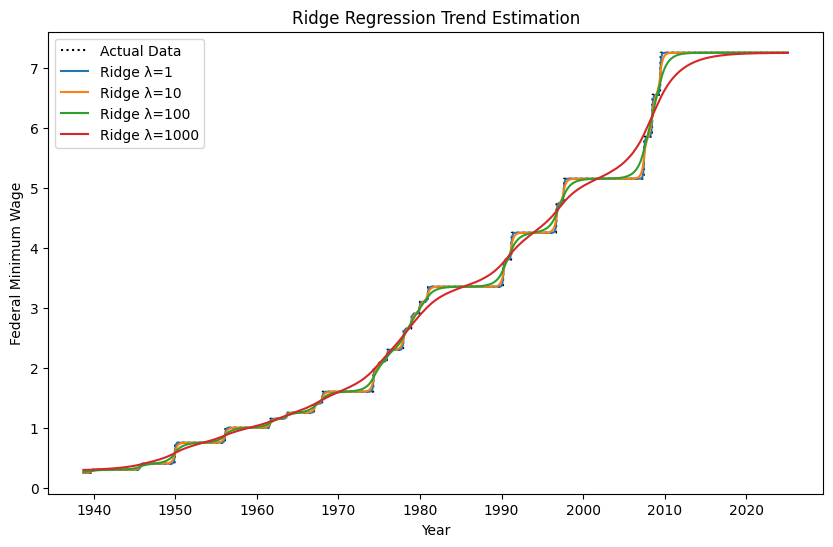

In [50]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt

# Load the dataset
file_path = "FEDMINNFRWG.csv"
df = pd.read_csv(file_path)

# Convert date column to datetime and sort data
df['observation_date'] = pd.to_datetime(df['observation_date'])
df = df.sort_values('observation_date')

# Extract the target variable (federal minimum wage)
y = df['FEDMINNFRWG'].values
n = len(y)

# Construct the design matrix X with indicator functions
X = np.tril(np.ones((n, n)))  # Lower triangular matrix

# Define the Ridge Regression function using cvxpy
def solve_ridge(X, y, lambda_val, penalty_start=1):
    """Solves Ridge Regression with given lambda value."""
    n, p = X.shape
    beta = cp.Variable(p)
    loss = cp.sum_squares(X @ beta - y)
    reg = lambda_val * cp.sum_squares(beta[penalty_start:])
    objective = cp.Minimize(loss + reg)
    prob = cp.Problem(objective)
    prob.solve()
    return beta.value

# Ridge regression for lambda = 1, 10, 100, 1000
lambda_values = [1, 10, 100, 1000]
ridge_estimates = {lmb: solve_ridge(X, y, lmb) for lmb in lambda_values}

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['observation_date'], y, label='Actual Data', linestyle='dotted', color='black')

for lmb, beta in ridge_estimates.items():
    plt.plot(df['observation_date'], X @ beta, label=f'Ridge λ={lmb}')

plt.xlabel('Year')
plt.ylabel('Federal Minimum Wage')
plt.title('Ridge Regression Trend Estimation')
plt.legend()
plt.show()


$\lambda = 1000$ provides the best summary for the data.

#### **Part b**

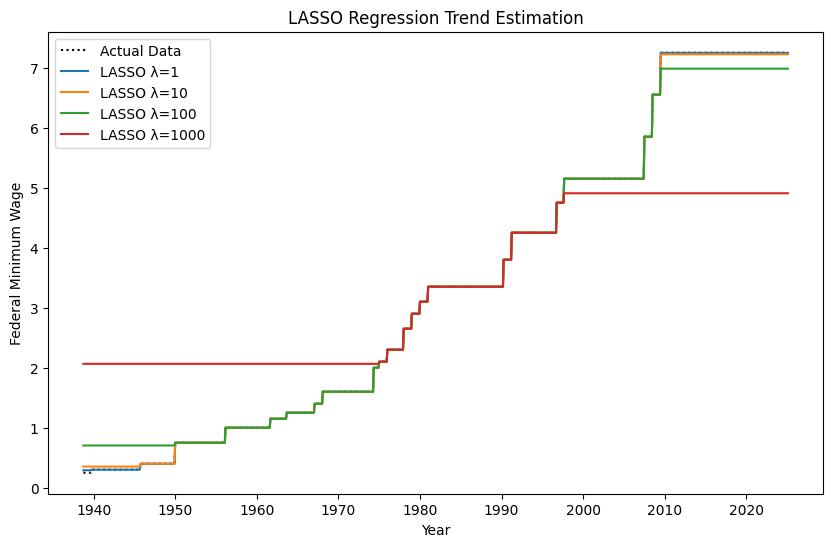

In [51]:
# Define the LASSO Regression function using cvxpy
def solve_lasso(X, y, lambda_val, penalty_start=1):
    n, p = X.shape
    beta = cp.Variable(p)
    loss = cp.sum_squares(X @ beta - y)
    reg = lambda_val * cp.norm1(beta[penalty_start:])  # L1 regularization
    objective = cp.Minimize(loss + reg)
    prob = cp.Problem(objective)
    prob.solve()
    return beta.value

# Perform LASSO Regression for different lambda values
lasso_estimates = {lmb: solve_lasso(X, y, lmb) for lmb in lambda_values}

# Plot the results for LASSO Regression
plt.figure(figsize=(10, 6))
plt.plot(df['observation_date'], y, label='Actual Data', linestyle='dotted', color='black')

for lmb, beta in lasso_estimates.items():
    plt.plot(df['observation_date'], X @ beta, label=f'LASSO λ={lmb}')

plt.xlabel('Year')
plt.ylabel('Federal Minimum Wage')
plt.title('LASSO Regression Trend Estimation')
plt.legend()
plt.show()


$\lambda = 1000$ provides the best summary.

### **Part c**

Ridge($\lambda = 1000$) provides the best summay amongs these 8 function.

## **Problem 3**

### **Part a**

### **1. Ridge Regression Objective Function**
The Ridge regression estimates $( \beta_0 )$ and $( \beta_1 )$ by minimizing the following objective function:

$
\min_{\beta_0, \beta_1} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)^2 + \lambda \beta_1^2
$

where:
- $( \lambda > 0 )$ is the regularization parameter.

### **2. Solving for Ridge Coefficients**
#### **Step 1: Compute $( \beta_0 )$**
Taking the partial derivative with respect to $( \beta_0 )$:

$
\frac{\partial}{\partial \beta_0} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)^2 + \lambda \beta_1^2 = 0
$

Expanding:

$
\sum_{i=1}^{n} 2(y_i - \beta_0 - \beta_1 x_i)(-1) = 0
$

$
\sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i) = 0
$

$
\sum_{i=1}^{n} y_i = n\beta_0 + \beta_1 \sum_{i=1}^{n} x_i
$

$
\beta_0 = \frac{\sum_{i=1}^{n} y_i}{n} - \beta_1 \frac{\sum_{i=1}^{n} x_i}{n} = \bar{y} - \beta_1 \bar{x}
$

#### **Step 2: Compute $( \beta_1 )$**
Taking the partial derivative with respect to $( \beta_1 )$:

$
\frac{\partial}{\partial \beta_1} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)^2 + \lambda \beta_1^2 = 0
$

Expanding:

$
\sum_{i=1}^{n} 2(y_i - \beta_0 - \beta_1 x_i)(-x_i) + 2\lambda \beta_1 = 0
$

$
\sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)x_i + \lambda \beta_1 = 0
$

Substituting $( \beta_0 = \bar{y} - \beta_1 \bar{x} )$:

$
\sum_{i=1}^{n} (y_i - \bar{y} + \beta_1 \bar{x} - \beta_1 x_i)x_i + \lambda \beta_1 = 0
$

$
\sum_{i=1}^{n} (y_i - \bar{y}) x_i + \beta_1 \bar{x} \sum_{i=1}^{n} x_i - \beta_1 \sum_{i=1}^{n} x_i^2 + \lambda \beta_1 = 0
$

Since $( \sum_{i=1}^{n} (y_i - \bar{y}) \bar{x} = \bar{x} \sum_{i=1}^{n} (y_i - \bar{y}) = 0 )$, we simplify:

$
\sum_{i=1}^{n} (y_i - \bar{y}) x_i - \beta_1 \sum_{i=1}^{n} (x_i - \bar{x})^2 + \lambda \beta_1 = 0
$

$
\beta_1 (\sum_{i=1}^{n} (x_i - \bar{x})^2 + \lambda) = \sum_{i=1}^{n} (y_i - \bar{y}) (x_i - \bar{x})
$

$
\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\lambda + \sum_{i=1}^{n} (x_i - \bar{x})^2}
$

### **Part b**

### **1. LASSO Regression Objective Function**
LASSO regression estimates $( \beta_0 )$ and $( \beta_1 )$ by minimizing the following objective function:

$
\min_{\beta_0, \beta_1} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)^2 + \lambda |\beta_1|
$

where:
- $( \lambda > 0 )$ is the regularization parameter.

---

### **2. Solving for LASSO Coefficients**
#### **Step 1: Compute $( \beta_0 )$**
Taking the partial derivative with respect to $( \beta_0 )$:

$
\frac{\partial}{\partial \beta_0} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)^2 + \lambda |\beta_1| = 0
$

Expanding:

$
\sum_{i=1}^{n} 2(y_i - \beta_0 - \beta_1 x_i)(-1) = 0
$

$
\sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i) = 0
$

$
\sum_{i=1}^{n} y_i = n\beta_0 + \beta_1 \sum_{i=1}^{n} x_i
$

$
\beta_0 = \frac{\sum_{i=1}^{n} y_i}{n} - \beta_1 \frac{\sum_{i=1}^{n} x_i}{n} = \bar{y} - \beta_1 \bar{x}
$

Thus, the LASSO estimate for $( \beta_0 )$ is:

$
\hat{\beta}_0^{\text{lasso}}(\lambda) = \bar{y} - \bar{x} \hat{\beta}_1^{\text{lasso}}(\lambda)
$

---

#### **Step 2: Compute $( \beta_1 )$**
Taking the partial derivative with respect to $( \beta_1 )$:

$
\frac{\partial}{\partial \beta_1} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)^2 + \lambda |\beta_1| = 0
$

Expanding:

$
\sum_{i=1}^{n} 2(y_i - \beta_0 - \beta_1 x_i)(-x_i) + \lambda \cdot \text{sign}(\beta_1) = 0
$

Substituting $( \beta_0 = \bar{y} - \beta_1 \bar{x} )$:

$
\sum_{i=1}^{n} (y_i - \bar{y} + \beta_1 \bar{x} - \beta_1 x_i)x_i + \frac{\lambda}{2} \text{sign}(\beta_1) = 0
$

$
\sum_{i=1}^{n} (y_i - \bar{y}) x_i - \beta_1 \sum_{i=1}^{n} (x_i - \bar{x})^2 + \frac{\lambda}{2} \text{sign}(\beta_1) = 0
$

Rearranging for $( \beta_1 )$:

$
\beta_1 \sum_{i=1}^{n} (x_i - \bar{x})^2 = \sum_{i=1}^{n} (y_i - \bar{y}) (x_i - \bar{x}) - \frac{\lambda}{2} \text{sign}(\beta_1)
$

$
\beta_1 = \frac{\sum_{i=1}^{n} (y_i - \bar{y})(x_i - \bar{x}) - \frac{\lambda}{2} \text{sign}(\beta_1)}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$

---

### **3. Piecewise Solution for $( \beta_1 )$**
Since the absolute value function $( |\beta_1| )$ causes non-differentiability at $( \beta_1 = 0 )$, we analyze three cases:

#### **Case 1: $( \sum_{i=1}^{n} (y_i - \bar{y})(x_i - \bar{x}) > \frac{\lambda}{2} )$**

$
\hat{\beta}_1^{\text{lasso}}(\lambda) = \frac{\sum_{i=1}^{n} (y_i - \bar{y})(x_i - \bar{x}) - \frac{\lambda}{2}}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$

#### **Case 2: $( \sum_{i=1}^{n} (y_i - \bar{y})(x_i - \bar{x}) < -\frac{\lambda}{2} )$**

$
\hat{\beta}_1^{\text{lasso}}(\lambda) = \frac{\sum_{i=1}^{n} (y_i - \bar{y})(x_i - \bar{x}) + \frac{\lambda}{2}}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$

#### **Case 3: $( -\frac{\lambda}{2} \leq \sum_{i=1}^{n} (y_i - \bar{y})(x_i - \bar{x}) \leq \frac{\lambda}{2} )$**

$
\hat{\beta}_1^{\text{lasso}}(\lambda) = 0
$

## **Problem 4**

### **Part a**

[1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]
1.0
CV errors for each lambda:
Lambda = 0.10, CV Error = 3.641771
Lambda = 1.00, CV Error = 3.529195
Lambda = 10.00, CV Error = 4.035778
Lambda = 100.00, CV Error = 5.041541
Lambda = 1000.00, CV Error = 6.701243
Lambda = 10000.00, CV Error = 8.873522
Lambda = 100000.00, CV Error = 15.392089


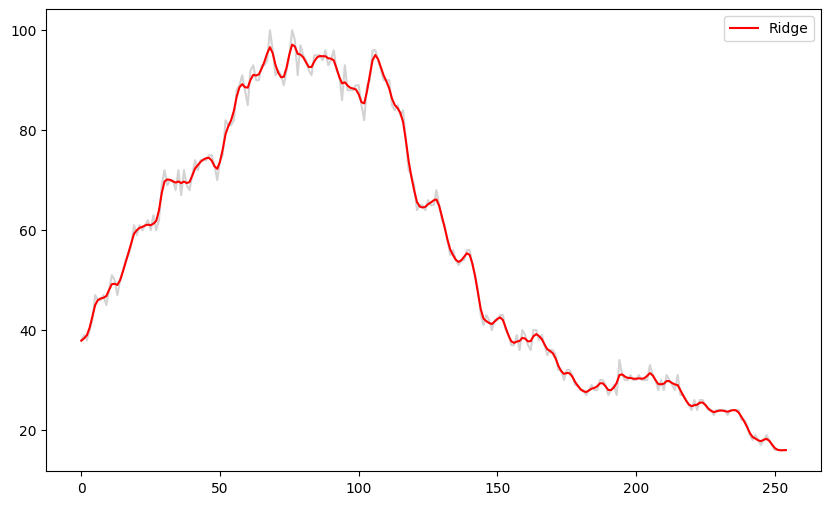

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import cvxpy as cp

#below penalty_start = 2 means that b0 and b1 are not included in the penalty
def solve_ridge(X, y, lambda_val, penalty_start=2):
    n, p = X.shape
    
    # Define variable
    beta = cp.Variable(p)
    
    # Define objective
    loss = cp.sum_squares(X @ beta - y)
    reg = lambda_val * cp.sum_squares(beta[penalty_start:])
    objective = cp.Minimize(loss + reg)
    
    # Solve problem
    prob = cp.Problem(objective)
    prob.solve()
    
    return beta.value

def ridge_cv(X, y, lambda_candidates):
    n = len(y)
    folds = []
    for i in range(5):
        test_indices = np.arange(i, n, 5)
        train_indices = np.array([j for j in range(n) if j % 5 != i])
        folds.append((train_indices, test_indices))
    cv_errors = {lamb: 0 for lamb in lambda_candidates}

    for train_index, test_index in folds:
        X_train = X[train_index]
        X_test = X[test_index]
        y_train = y[train_index]
        y_test = y[test_index]

        for lamb in lambda_candidates:
            beta = solve_ridge(X_train, y_train, lambda_val = lamb)
            y_pred = np.dot(X_test, beta)
            squared_errors = (y_test - y_pred) ** 2
            cv_errors[lamb] += np.sum(squared_errors)
    for lamb in lambda_candidates:
        cv_errors[lamb] /= n
        
    best_lambda = min(cv_errors, key = cv_errors.get)

    return best_lambda, cv_errors


file_path = 'multiTimeline_yahoo.csv'
df = pd.read_csv(file_path, skiprows=1)  # Skip description row
df.columns = ['date', 'value']
df['date'] = pd.to_datetime(df['date'])
df['time_index'] = np.arange(1, len(df) + 1)

# Extract data
y = df['value'].values
x = df['time_index'].values
n = len(y)
x = np.arange(1, n+1)
X = np.column_stack([np.ones(n), x-1])
for i in range(n-2):
    c = i+2
    xc = ((x > c).astype(float))*(x-c)
    X = np.column_stack([X, xc])

lambda_candidates = np.array([0.1, 1, 10, 100, 1000, 10000, 100000])
print(lambda_candidates)

best_lambda, cv_errors = ridge_cv(X, y, lambda_candidates)
print(best_lambda)
print("CV errors for each lambda:")
for lamb, error in sorted(cv_errors.items()):
    print(f"Lambda = {lamb:.2f}, CV Error = {error:.6f}")

b_ridge = solve_ridge(X, y, lambda_val = best_lambda)
ridge_fitted = np.dot(X, b_ridge)
plt.figure(figsize = (10, 6))
plt.plot(y, color = 'lightgray')
plt.plot(ridge_fitted, color = 'red', label = 'Ridge')
plt.legend()
plt.show()

### **Part b**

**i**

399
1.0 1.0
1.0


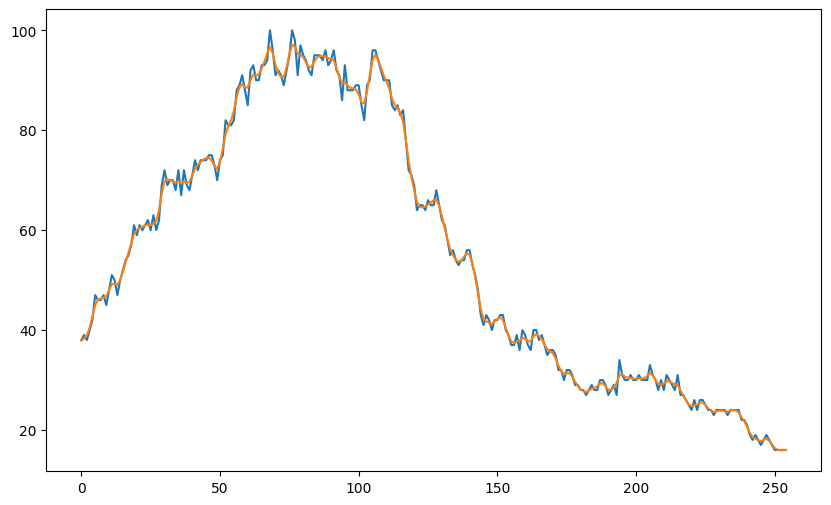

In [53]:
C = 10**4

tau_gr = np.logspace(np.log10(0.0001), np.log10(1), 20)
sig_gr = np.logspace(np.log10(0.1), np.log10(1), 20)
#sig_gr = np.array([0.16])

t, s = np.meshgrid(tau_gr, sig_gr)

g = pd.DataFrame({'tau': t.flatten(), 'sig': s.flatten()})

for i in range(len(g)):
    tau = g.loc[i, 'tau']
    sig = g.loc[i, 'sig']
    Q = np.diag(np.concatenate([[C, C], np.repeat(tau**2, n-2)]))
    Mat = np.linalg.inv(Q) + (X.T @ X)/(sig ** 2)
    Matinv = np.linalg.inv(Mat)
    sgn, logcovdet = np.linalg.slogdet(Matinv)
    sgnQ, logcovdetQ = np.linalg.slogdet(Q)
    g.loc[i, 'logpost'] = (-n-1)*np.log(sig) - np.log(tau) - 0.5 * logcovdetQ + 0.5 * logcovdet - ((np.sum(y ** 2))/(2*(sig ** 2))) + (y.T @ X @ Matinv @ X.T @ y)/(2 * (sig ** 4))

#Posterior maximizers:
max_row = g['logpost'].idxmax()
print(max_row)
tau_opt = g.loc[max_row, 'tau']
sig_opt = g.loc[max_row, 'sig']
print(tau_opt, sig_opt)
ratio = sig_opt**2 / tau_opt**2
print(ratio)

# Posterior mean of beta with tau_opt and sig_opt
Q = np.diag(np.concatenate([[C, C], np.repeat(tau_opt**2, n-2)]))

XTX = np.dot(X.T, X)
TempMat = np.linalg.inv(np.linalg.inv(Q) + (XTX/(sig_opt ** 2)))
XTy = np.dot(X.T, y)

betahat = np.dot(TempMat, XTy/(sig_opt ** 2))
muhat = np.dot(X, betahat)

plt.figure(figsize = (10, 6))
plt.plot(y)
plt.plot(muhat)
plt.show()

**ii**

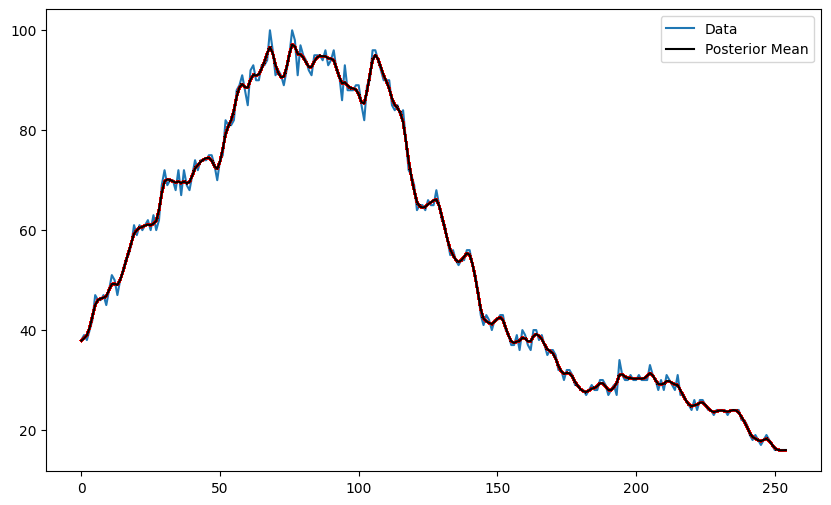

In [54]:
g['post'] = np.exp(g['logpost'] - np.max(g['logpost']))
g['post'] = g['post']/np.sum(g['post'])
N = 1000
samples = g.sample(N, weights = g['post'], replace = True)
tau_samples = np.array(samples.iloc[:,0])
sig_samples = np.array(samples.iloc[:,1])
betahats = np.zeros((n, N))
muhats = np.zeros((n, N))
for i in range(N):
    tau = tau_samples[i]
    sig = sig_samples[i]
    Q = np.diag(np.concatenate([[C, C], np.repeat(tau**2, n-2)]))
    XTX = np.dot(X.T, X)
    TempMat = np.linalg.inv(np.linalg.inv(Q) + (XTX/(sig ** 2)))
    XTy = np.dot(X.T, y)
    betahat = np.dot(TempMat, XTy/(sig ** 2))
    muhat = np.dot(X, betahat)
    betahats[:,i] = betahat
    muhats[:,i] = muhat

beta_est = np.mean(betahats, axis = 1)
mu_est = np.mean(muhats, axis = 1) #these are the fitted values
plt.figure(figsize = (10, 6))
plt.plot(y, label = 'Data')
for i in range(N):
    plt.plot(muhats[:,i], color = 'red')
plt.plot(mu_est, color = 'black', label = 'Posterior Mean')
plt.legend()
plt.show()

**iii**

Ridge regression from Part a provides a smoother trend estimate, so I prefer the ridge regression.

## **Problem 5**

### **Part a**

[1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]
0.1
CV errors for each lambda:
Lambda = 0.10, CV Error = 18.819188
Lambda = 1.00, CV Error = 18.866577
Lambda = 10.00, CV Error = 71.209054
Lambda = 100.00, CV Error = 189.635108
Lambda = 1000.00, CV Error = 223.805138
Lambda = 10000.00, CV Error = 228.491390
Lambda = 100000.00, CV Error = 230.453150


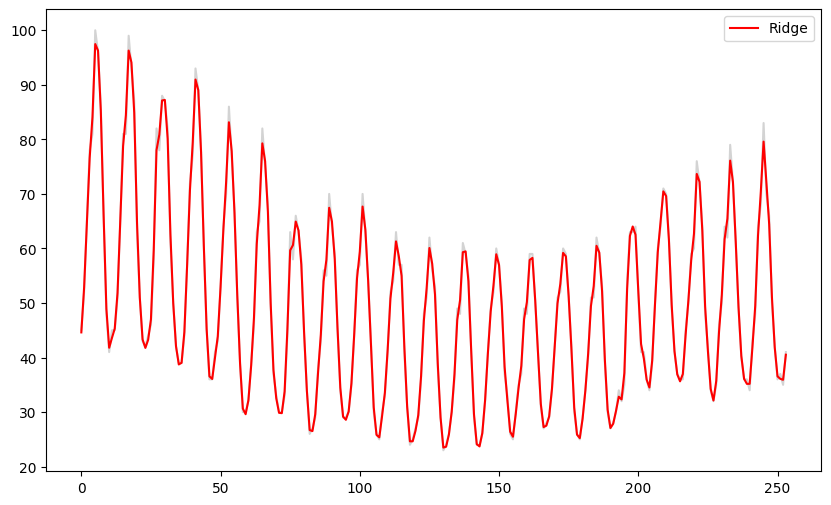

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import cvxpy as cp

#below penalty_start = 2 means that b0 and b1 are not included in the penalty
def solve_ridge(X, y, lambda_val, penalty_start=2):
    n, p = X.shape
    
    # Define variable
    beta = cp.Variable(p)
    
    # Define objective
    loss = cp.sum_squares(X @ beta - y)
    reg = lambda_val * cp.sum_squares(beta[penalty_start:])
    objective = cp.Minimize(loss + reg)
    
    # Solve problem
    prob = cp.Problem(objective)
    prob.solve()
    
    return beta.value

def ridge_cv(X, y, lambda_candidates):
    n = len(y)
    folds = []
    for i in range(5):
        test_indices = np.arange(i, n, 5)
        train_indices = np.array([j for j in range(n) if j % 5 != i])
        folds.append((train_indices, test_indices))
    cv_errors = {lamb: 0 for lamb in lambda_candidates}

    for train_index, test_index in folds:
        X_train = X[train_index]
        X_test = X[test_index]
        y_train = y[train_index]
        y_test = y[test_index]

        for lamb in lambda_candidates:
            beta = solve_ridge(X_train, y_train, lambda_val = lamb)
            y_pred = np.dot(X_test, beta)
            squared_errors = (y_test - y_pred) ** 2
            cv_errors[lamb] += np.sum(squared_errors)
    for lamb in lambda_candidates:
        cv_errors[lamb] /= n
        
    best_lambda = min(cv_errors, key = cv_errors.get)

    return best_lambda, cv_errors


file_path = 'multiTimeline_golf.csv'
df = pd.read_csv(file_path, skiprows=1) 
df.columns = ['date', 'value']
df['date'] = pd.to_datetime(df['date'])
df['time_index'] = np.arange(1, len(df) + 1)

y = df['value'].values
x = df['time_index'].values
n = len(y)
x = np.arange(1, n+1)
X = np.column_stack([np.ones(n), x-1])
for i in range(n-2):
    c = i+2
    xc = ((x > c).astype(float))*(x-c)
    X = np.column_stack([X, xc])

lambda_candidates = np.array([0.1, 1, 10, 100, 1000, 10000, 100000])
print(lambda_candidates)

best_lambda, cv_errors = ridge_cv(X, y, lambda_candidates)
print(best_lambda)
print("CV errors for each lambda:")
for lamb, error in sorted(cv_errors.items()):
    print(f"Lambda = {lamb:.2f}, CV Error = {error:.6f}")

b_ridge = solve_ridge(X, y, lambda_val = best_lambda)
ridge_fitted = np.dot(X, b_ridge)
plt.figure(figsize = (10, 6))
plt.plot(y, color = 'lightgray')
plt.plot(ridge_fitted, color = 'red', label = 'Ridge')
plt.legend()
plt.show()

### **Part b**

**i**

399
1.0 1.0
1.0


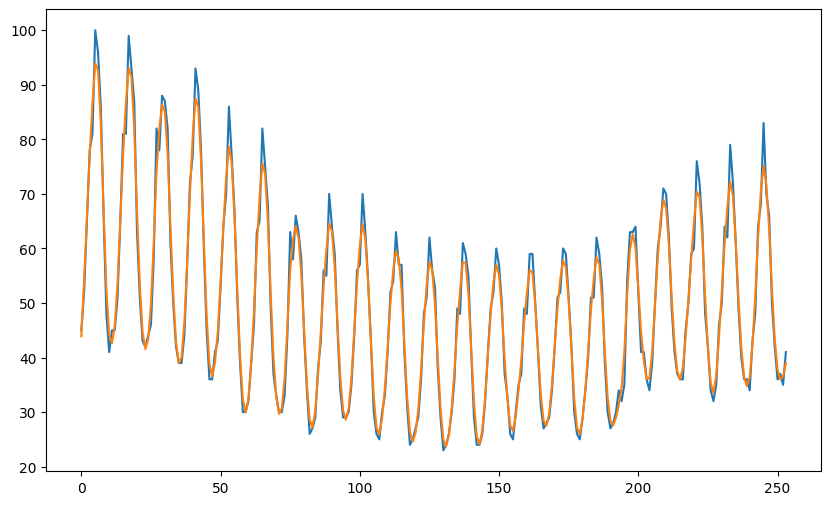

In [56]:
C = 10**4

tau_gr = np.logspace(np.log10(0.0001), np.log10(1), 20)
sig_gr = np.logspace(np.log10(0.1), np.log10(1), 20)
#sig_gr = np.array([0.16])

t, s = np.meshgrid(tau_gr, sig_gr)

g = pd.DataFrame({'tau': t.flatten(), 'sig': s.flatten()})

for i in range(len(g)):
    tau = g.loc[i, 'tau']
    sig = g.loc[i, 'sig']
    Q = np.diag(np.concatenate([[C, C], np.repeat(tau**2, n-2)]))
    Mat = np.linalg.inv(Q) + (X.T @ X)/(sig ** 2)
    Matinv = np.linalg.inv(Mat)
    sgn, logcovdet = np.linalg.slogdet(Matinv)
    sgnQ, logcovdetQ = np.linalg.slogdet(Q)
    g.loc[i, 'logpost'] = (-n-1)*np.log(sig) - np.log(tau) - 0.5 * logcovdetQ + 0.5 * logcovdet - ((np.sum(y ** 2))/(2*(sig ** 2))) + (y.T @ X @ Matinv @ X.T @ y)/(2 * (sig ** 4))

#Posterior maximizers:
max_row = g['logpost'].idxmax()
print(max_row)
tau_opt = g.loc[max_row, 'tau']
sig_opt = g.loc[max_row, 'sig']
print(tau_opt, sig_opt)
ratio = sig_opt**2 / tau_opt**2
print(ratio)

# Posterior mean of beta with tau_opt and sig_opt
tau = tau_opt
sig = sig_opt
Q = np.diag(np.concatenate([[C, C], np.repeat(tau**2, n-2)]))

XTX = np.dot(X.T, X)
TempMat = np.linalg.inv(np.linalg.inv(Q) + (XTX/(sig ** 2)))
XTy = np.dot(X.T, y)

betahat = np.dot(TempMat, XTy/(sig ** 2))
muhat = np.dot(X, betahat)

plt.figure(figsize = (10, 6))
plt.plot(y)
plt.plot(muhat)
plt.show()

**ii**

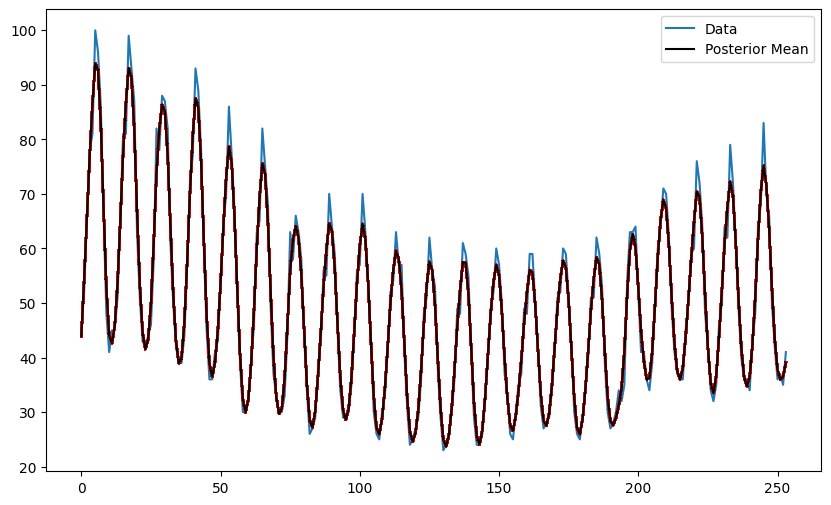

In [57]:
g['post'] = np.exp(g['logpost'] - np.max(g['logpost']))
g['post'] = g['post']/np.sum(g['post'])
N = 1000
samples = g.sample(N, weights = g['post'], replace = True)
tau_samples = np.array(samples.iloc[:,0])
sig_samples = np.array(samples.iloc[:,1])
betahats = np.zeros((n, N))
muhats = np.zeros((n, N))
for i in range(N):
    tau = tau_samples[i]
    sig = sig_samples[i]
    Q = np.diag(np.concatenate([[C, C], np.repeat(tau**2, n-2)]))
    XTX = np.dot(X.T, X)
    TempMat = np.linalg.inv(np.linalg.inv(Q) + (XTX/(sig ** 2)))
    XTy = np.dot(X.T, y)
    betahat = np.dot(TempMat, XTy/(sig ** 2))
    muhat = np.dot(X, betahat)
    betahats[:,i] = betahat
    muhats[:,i] = muhat

beta_est = np.mean(betahats, axis = 1)
mu_est = np.mean(muhats, axis = 1) #these are the fitted values
plt.figure(figsize = (10, 6))
plt.plot(y, label = 'Data')
for i in range(N):
    plt.plot(muhats[:,i], color = 'red')
plt.plot(mu_est, color = 'black', label = 'Posterior Mean')
plt.legend()
plt.show()

**iii**

From two graphes, Bayesian trend estimate is smoother, so I prefer the Bayesian trend estimate.

## **Problem 6**

### **Part a**

[1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]
1.0
CV errors for each lambda:
Lambda = 0.10, CV Error = 18.339430
Lambda = 1.00, CV Error = 15.846146
Lambda = 10.00, CV Error = 19.399858
Lambda = 100.00, CV Error = 67.834483
Lambda = 1000.00, CV Error = 188.599596
Lambda = 10000.00, CV Error = 224.199922
Lambda = 100000.00, CV Error = 229.833292


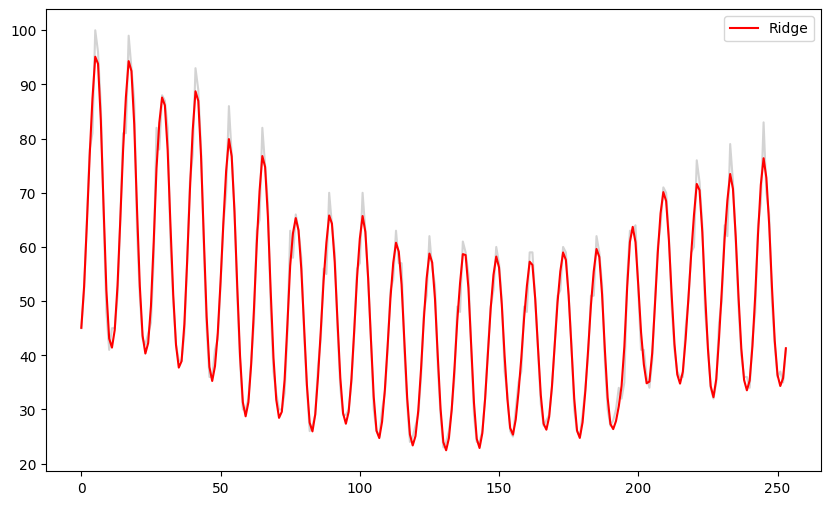

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp

file_path = 'multiTimeline_golf.csv'
df = pd.read_csv(file_path, skiprows=1)
df.columns = ['date', 'value']
df['date'] = pd.to_datetime(df['date'])
df['time_index'] = np.arange(1, len(df) + 1)

# Extract data
y = df['value'].values
x = df['time_index'].values
n = len(y)


x = np.arange(1, n+1)
X = np.column_stack([np.ones(n), x-1])
for i in range(n-2):
    c = i+2
    xc = ((x > c).astype(float)) * (x - c)
    X = np.column_stack([X, xc])
X = np.column_stack([
    X,
    np.cos(2 * np.pi * x / 12),  # Cosine term for seasonality
    np.sin(2 * np.pi * x / 12)   # Sine term for seasonality
])

#note that penalty_start is now set to 1 (instead of 2 as in the model used in class)
def solve_ridge(X, y, lambda_val, penalty_start=1):
    n, p = X.shape
    
    # Define variable
    beta = cp.Variable(p)
    
    # Define objective
    loss = cp.sum_squares(X @ beta - y)
    reg = lambda_val * cp.sum_squares(beta[penalty_start:])
    objective = cp.Minimize(loss + reg)
    
    # Solve problem
    prob = cp.Problem(objective)
    prob.solve()
    
    return beta.value

def ridge_cv(X, y, lambda_candidates):
    n = len(y)
    folds = []
    for i in range(5):
        test_indices = np.arange(i, n, 5)
        train_indices = np.array([j for j in range(n) if j % 5 != i])
        folds.append((train_indices, test_indices))
    cv_errors = {lamb: 0 for lamb in lambda_candidates}

    for train_index, test_index in folds:
        X_train = X[train_index]
        X_test = X[test_index]
        y_train = y[train_index]
        y_test = y[test_index]

        for lamb in lambda_candidates:
            beta = solve_ridge(X_train, y_train, lambda_val = lamb)
            y_pred = np.dot(X_test, beta)
            squared_errors = (y_test - y_pred) ** 2
            cv_errors[lamb] += np.sum(squared_errors)
    for lamb in lambda_candidates:
        cv_errors[lamb] /= n
        
    best_lambda = min(cv_errors, key = cv_errors.get)

    return best_lambda, cv_errors

lambda_candidates = np.array([0.1, 1, 10, 100, 1000, 10000, 100000])
print(lambda_candidates)

best_lambda, cv_errors = ridge_cv(X, y, lambda_candidates)
print(best_lambda)
print("CV errors for each lambda:")
for lamb, error in sorted(cv_errors.items()):
    print(f"Lambda = {lamb:.2f}, CV Error = {error:.6f}")

b_ridge = solve_ridge(X, y, lambda_val = best_lambda)
ridge_fitted = np.dot(X, b_ridge)
plt.figure(figsize = (10, 6))
plt.plot(y, color = 'lightgray')
plt.plot(ridge_fitted, color = 'red', label = 'Ridge')
plt.legend()
plt.show()

### **Part b**

**i**

399
1.0 1.0
1.0


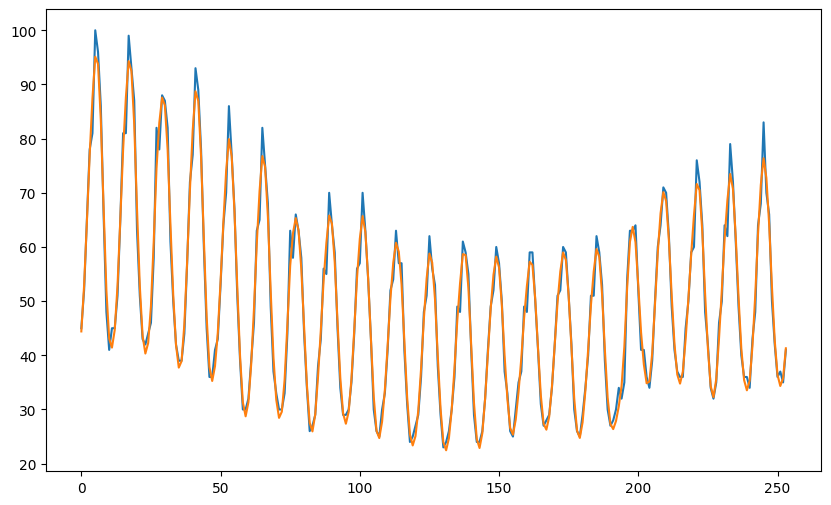

In [59]:
C = 10**4

tau_gr = np.logspace(np.log10(0.0001), np.log10(1), 20)
sig_gr = np.logspace(np.log10(0.1), np.log10(1), 20)
#sig_gr = np.array([0.16])

t, s = np.meshgrid(tau_gr, sig_gr)

g = pd.DataFrame({'tau': t.flatten(), 'sig': s.flatten()})

for i in range(len(g)):
    tau = g.loc[i, 'tau']
    sig = g.loc[i, 'sig']
    Q = np.diag(np.concatenate([[C, C], np.repeat(tau**2, X.shape[1]-2)]))
    Mat = np.linalg.inv(Q) + (X.T @ X)/(sig ** 2)
    Matinv = np.linalg.inv(Mat)
    sgn, logcovdet = np.linalg.slogdet(Matinv)
    sgnQ, logcovdetQ = np.linalg.slogdet(Q)
    g.loc[i, 'logpost'] = (-n-1)*np.log(sig) - np.log(tau) - 0.5 * logcovdetQ + 0.5 * logcovdet - ((np.sum(y ** 2))/(2*(sig ** 2))) + (y.T @ X @ Matinv @ X.T @ y)/(2 * (sig ** 4))

#Posterior maximizers:
max_row = g['logpost'].idxmax()
print(max_row)
tau_opt = g.loc[max_row, 'tau']
sig_opt = g.loc[max_row, 'sig']
print(tau_opt, sig_opt)
ratio = sig_opt**2 / tau_opt**2
print(ratio)

# Posterior mean of beta with tau_opt and sig_opt
tau = tau_opt
sig = sig_opt
Q = np.diag(np.concatenate([[C, C], np.repeat(tau**2, X.shape[1]-2)]))

XTX = np.dot(X.T, X)
TempMat = np.linalg.inv(np.linalg.inv(Q) + (XTX/(sig ** 2)))
XTy = np.dot(X.T, y)

betahat = np.dot(TempMat, XTy/(sig ** 2))
muhat = np.dot(X, betahat)

plt.figure(figsize = (10, 6))
plt.plot(y)
plt.plot(muhat)
plt.show()

**ii**

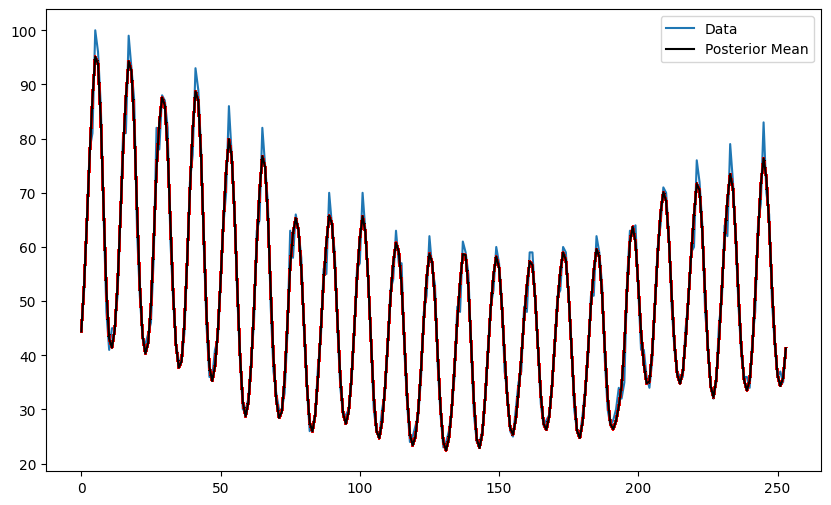

In [60]:
g['post'] = np.exp(g['logpost'] - np.max(g['logpost']))
g['post'] = g['post']/np.sum(g['post'])
N = 1000
samples = g.sample(N, weights = g['post'], replace = True)
tau_samples = np.array(samples.iloc[:,0])
sig_samples = np.array(samples.iloc[:,1])
betahats = np.zeros((X.shape[1], N))
muhats = np.zeros((n, N))
for i in range(N):
    tau = tau_samples[i]
    sig = sig_samples[i]
    Q = np.diag(np.concatenate([[C, C], np.repeat(tau**2, X.shape[1] - 2)]))
    XTX = np.dot(X.T, X)
    TempMat = np.linalg.inv(np.linalg.inv(Q) + (XTX/(sig ** 2)))
    XTy = np.dot(X.T, y)
    betahat = np.dot(TempMat, XTy/(sig ** 2))
    muhat = np.dot(X, betahat)
    betahats[:,i] = betahat
    muhats[:,i] = muhat

beta_est = np.mean(betahats, axis = 1)
mu_est = np.mean(muhats, axis = 1) #these are the fitted values
plt.figure(figsize = (10, 6))
plt.plot(y, label = 'Data')
for i in range(N):
    plt.plot(muhats[:,i], color = 'red')
plt.plot(mu_est, color = 'black', label = 'Posterior Mean')
plt.legend()
plt.show()

**iii**

From two graphs, bayesian trend estimate is smoother, so I prefer bayesian trend estimate

## **Problem 7**

### **Part a**

## **1. Model Specification**
We consider the following Bayesian regression model:

$
y = X\beta + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2 I)
$

where:
- $( y )$ is the $( n \times 1 )$ response vector,
- $( X )$ is the $( n \times p )$ design matrix,
- $( \beta )$ is the $( p \times 1 )$ vector of regression coefficients,
- $( \epsilon )$ is an independent Gaussian noise term.

## **2. Prior Distributions**
The Bayesian model assumes the following prior distributions:

$
\beta | \tau, \sigma \sim \mathcal{N}(0, Q)
$

where \( Q \) is a diagonal matrix given by:

$
Q = \text{diag}(C, C, \tau^2, \tau^2, \dots, \tau^2)
$

Additionally, the hyperparameters $( \tau )$ and $( \sigma )$ follow uniform priors:

$
\log \tau \sim \text{Uniform}(-C, C), \quad \log \sigma \sim \text{Uniform}(-C, C)
$

## **3. Likelihood Function**
The likelihood function for $( y )$ given $( X )$, $( \beta )$, and $( \sigma^2 )$ is:

$
p(y | X, \beta, \sigma^2) = (2\pi\sigma^2)^{-\frac{n}{2}} \exp \left( -\frac{1}{2\sigma^2} (y - X\beta)^\top (y - X\beta) \right)
$

## **4. Prior Density of $( \beta )$**
The prior density of $( \beta )$ given $( \tau )$ and $( \sigma )$ is:

$
p(\beta | \tau, \sigma) = (2\pi)^{-\frac{n}{2}} |Q|^{-\frac{1}{2}} \exp\left(-\frac{1}{2} \beta^\top Q^{-1} \beta \right)
$

Since $( Q )$ is diagonal:

$
Q^{-1} = \text{diag}(1/C, 1/C, 1/\tau^2, \dots, 1/\tau^2)
$

Thus, the quadratic form simplifies to:

$
\beta^\top Q^{-1} \beta = \frac{\beta_0^2}{C} + \frac{\beta_1^2}{C} + \sum_{j=2}^{p} \frac{\beta_j^2}{\tau^2}
$

## **5. Posterior Distribution of $( \beta )$**
By Bayes' theorem, the posterior distribution is proportional to the product of the likelihood and prior:

$
p(\beta | y, X, \tau, \sigma) \propto p(y | X, \beta, \sigma) p(\beta | \tau, \sigma)
$

Substituting the expressions:

$
p(\beta | y, X, \tau, \sigma) \propto \exp \left( -\frac{1}{2\sigma^2} (y - X\beta)^\top (y - X\beta) \right) \cdot \exp \left( -\frac{1}{2} \beta^\top Q^{-1} \beta \right)
$

Expanding the quadratic terms:

$
(y - X\beta)^\top (y - X\beta) = y^\top y - 2\beta^\top X^\top y + \beta^\top X^\top X \beta
$

$
-\frac{1}{2} \left[ \frac{1}{\sigma^2} (y^\top y - 2\beta^\top X^\top y + \beta^\top X^\top X \beta) + \beta^\top Q^{-1} \beta \right]
$

Rearrange:

$
-\frac{1}{2} \left( \beta^\top \left( Q^{-1} + \frac{1}{\sigma^2} X^\top X \right) \beta - 2\frac{1}{\sigma^2} \beta^\top X^\top y \right)
$

This matches the **Gaussian density function**, implying:

$
\beta | y, X, \tau, \sigma \sim \mathcal{N}(\mu_n, \Sigma_n)
$

where:

- **Posterior mean:**
  $
  \mu_n = \Sigma_n \frac{1}{\sigma^2} X^\top y
  $
- **Posterior covariance:**
  $
  \Sigma_n = \left( Q^{-1} + \frac{1}{\sigma^2} X^\top X \right)^{-1}
  $
- **Precision matrix $( Q^{-1} )$:**
  $
  Q^{-1} = \text{diag}(1/C, 1/C, 1/\tau^2, \dots, 1/\tau^2)
  $

### **Part b**

# **Bayesian Inference: Posterior Distribution of $( \tau )$**

## **1. Model Specification**
We assume the following Bayesian regression model:

$
y = X\beta + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2 I)
$

The prior distributions are given as:

$
\beta | \tau, \sigma \sim \mathcal{N}(0, Q)
$

where:

$
Q = \text{diag}(C, C, \tau^2, \tau^2, \dots, \tau^2)
$

Additionally, $( \tau )$ follows a log-uniform prior:

$
\log \tau \sim \text{Uniform}(-C, C) \quad \Rightarrow \quad p(\tau) \propto \frac{1}{\tau}
$

## **2. Posterior Distribution of $( \tau )$**

By Bayes' theorem:

$
p(\tau | \beta, y, X, \sigma) \propto p(\beta | \tau, \sigma) p(\tau)
$

Expanding the prior density:

$
p(\beta | \tau, \sigma) = (2\pi)^{-p/2} |Q|^{-1/2} \exp\left(-\frac{1}{2} \beta^\top Q^{-1} \beta \right)
$

Since:

$
Q^{-1} = \text{diag}(1/C, 1/C, 1/\tau^2, \dots, 1/\tau^2)
$

we have:

$
\beta^\top Q^{-1} \beta = \frac{\beta_0^2}{C} + \frac{\beta_1^2}{C} + \sum_{j=2}^{n-1} \frac{\beta_j^2}{\tau^2}
$

After simplifying:

$
p(\tau | \beta, y, X, \sigma) \propto \tau^{-(n-1)} \exp \left(-\frac{1}{2\tau^2} \sum_{j=2}^{n-1} \beta_j^2 \right)
$

This is recognized as an **Inverse-Gamma** distribution:

$
\tau^2 | \beta, y, X, \sigma \sim \text{Inverse-Gamma} \left(\frac{n-2}{2}, \frac{1}{2} \sum_{j=2}^{n-1} \beta_j^2 \right)
$

or equivalently:

$
\frac{1}{\tau^2} | \beta, y, X, \sigma \sim \text{Gamma} \left(\frac{n-2}{2}, \frac{1}{2} \sum_{j=2}^{n-1} \beta_j^2 \right)
$

### **Part c**

# **Bayesian Inference: Posterior Distribution of $( \sigma^2 )$**

## **1. Model Specification**
We assume the following Bayesian regression model:

$
y = X\beta + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2 I)
$

The prior distributions are given as:

$
p(\sigma) \propto \frac{1}{\sigma}
$

which is equivalent to:

$
p(\sigma^2) \propto \frac{1}{\sigma^2}
$

## **2. Posterior Distribution of $( \sigma^2 )$**

By Bayes' theorem:

$
p(\sigma^2 | \beta, \tau, y, X) \propto p(y | X, \beta, \sigma^2) p(\sigma^2)
$

Expanding the likelihood function:

$
p(y | X, \beta, \sigma^2) = (2\pi\sigma^2)^{-n/2} \exp \left( -\frac{1}{2\sigma^2} (y - X\beta)^\top (y - X\beta) \right)
$

Multiplying by the prior:

$
p(\sigma^2 | \beta, \tau, y, X) \propto (\sigma^2)^{-\frac{n}{2} - 1} \exp \left( -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - X_i^\top \beta)^2 \right)
$

Recognizing the **Inverse-Gamma** distribution:

$
\sigma^2 | \beta, \tau, y, X \sim \text{Inverse-Gamma} \left(\frac{n}{2}, \frac{1}{2} \sum_{i=1}^{n} (y_i - X_i^\top \beta)^2 \right)
$

or equivalently:

$
\frac{1}{\sigma^2} | \beta, \tau, y, X \sim \text{Gamma} \left(\frac{n}{2}, \frac{1}{2} \sum_{i=1}^{n} (y_i - X_i^\top \beta)^2 \right)
$

### **Part d**


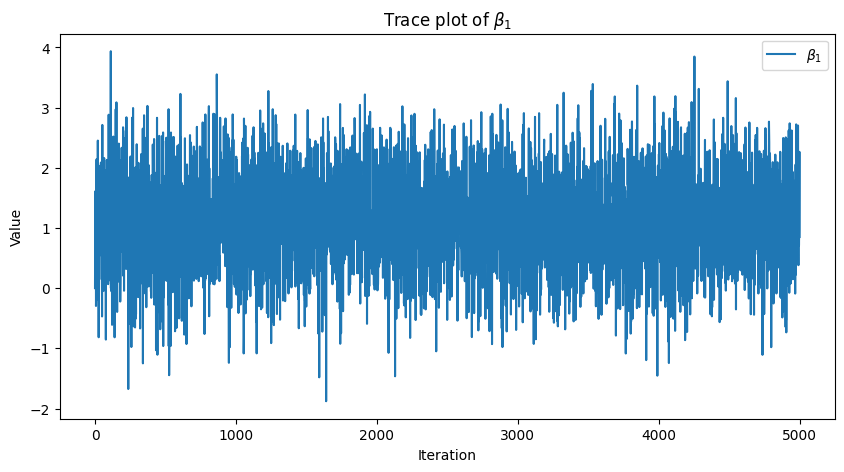

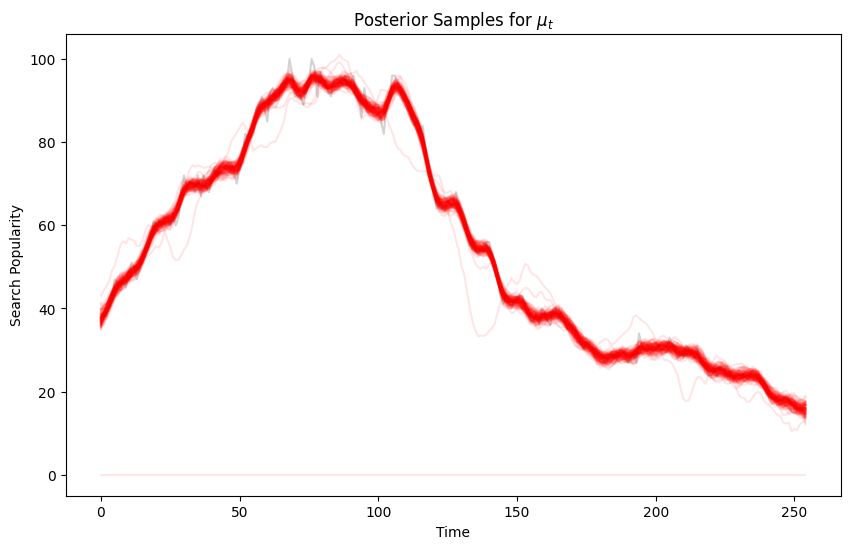

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import invgamma, multivariate_normal

file_path = "multiTimeline_yahoo.csv"
df = pd.read_csv(file_path, skiprows=1)  
df.columns = ['date', 'value']
df['date'] = pd.to_datetime(df['date'])
df['time_index'] = np.arange(1, len(df) + 1)

y = df['value'].values
x = df['time_index'].values
n = len(y)

X = np.column_stack([np.ones(n), x - 1])
for i in range(n-2):
    c = i+2
    xc = ((x > c).astype(float)) * (x - c)
    X = np.column_stack([X, xc])

N_samples = 5000
C = 10**4 
beta_samples = np.zeros((N_samples, X.shape[1]))
tau_samples = np.zeros(N_samples)
sigma_samples = np.zeros(N_samples)

beta_samples[0] = np.zeros(X.shape[1])
tau_samples[0] = 1
sigma_samples[0] = np.std(y)

for i in range(1, N_samples):

    tau = tau_samples[i-1]
    sigma = sigma_samples[i-1]
    Q_inv = np.diag([1/C, 1/C] + [1/tau**2] * (X.shape[1] - 2))

    Sigma_n = np.linalg.inv(Q_inv + (X.T @ X) / sigma**2)
    mu_n = Sigma_n @ (X.T @ y) / sigma**2

    beta_samples[i] = multivariate_normal.rvs(mean=mu_n, cov=Sigma_n)

    beta_2n = np.sum(beta_samples[i, 2:] ** 2)
    tau_samples[i] = np.sqrt(invgamma.rvs(a=(n-2)/2, scale=beta_2n/2))

    sigma_scale = np.sum((y - X @ beta_samples[i])**2) / 2
    sigma_samples[i] = np.sqrt(invgamma.rvs(a=n/2, scale=sigma_scale))

plt.figure(figsize=(10, 5))
plt.plot(beta_samples[:, 1], label=r"$\beta_1$")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title(r"Trace plot of $\beta_1$")
plt.legend()
plt.show()

mu_samples = X @ beta_samples.T
plt.figure(figsize=(10, 6))
plt.plot(y, color='lightgray', label="Observed Data")
for i in range(100):
    plt.plot(mu_samples[:, i], color='red', alpha=0.1)
plt.xlabel("Time")
plt.ylabel("Search Popularity")
plt.title("Posterior Samples for $\mu_t$")
plt.show()

- Both methods produce similar posterior means, confirming the Gibbs sampler's accuracy.
- 4(b) is slightly smoother, possibly due to direct integration over the posterior distribution.
- 7(d) provides more explicit posterior samples, which is useful when uncertainty quantification is needed.